# IMPORT

## IMPORT LIBRARY

In [1]:
# DataFrame
import pandas as pd

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #merubah string menjadi angka dengan vectorizer

# Keras

from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D

#Tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Dropout


# nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

#algoritma

from sklearn.naive_bayes import MultinomialNB, ComplementNB #import algoritma Naive Bayes yang digunakan
from sklearn import svm #import algoritma SVM
from sklearn.ensemble import RandomForestClassifier #import algoritma Random Forest
from tensorflow.keras.layers import LSTM #import algoritma LSTM
from tensorflow.keras.optimizers import SGD

#score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Word2vec
from wordcloud import WordCloud 

# Utility
import string
import re
import numpy as np
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## IMPORT DATASET

In [2]:
#mengimport dataset untuk twitter sentiment
data = pd.read_csv('dataset/sentiment_train.csv', encoding='latin-1')

In [3]:
data #menampilkan data yang digunakan

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


# CODE

In [4]:
#fungsi untuk merubah label sentiment dari angka menjadi tulisan

decode_map = {0: "negative", 1:"positive"}

def decode_sentiment(label):
    return decode_map[int(label)]

In [5]:
data['label'] = data['Sentiment'].apply(lambda x: decode_sentiment(x)) #mengaply perubahan yang sudah dibuat sebelumnya

In [6]:
data.head() #menampilkan data

,ItemID,Sentiment,SentimentText,label
0,1,0,is so sad for my APL frie...,negative
1,2,0,I missed the New Moon trail...,negative
2,3,1,omg its already 7:30 :O,positive
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,negative
4,5,0,i think mi bf is cheating on me!!! ...,negative


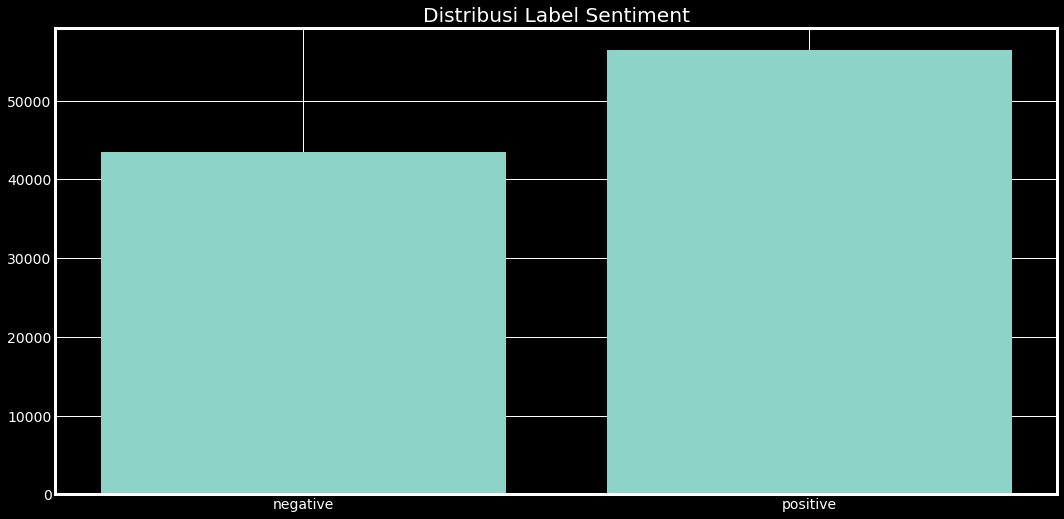

In [7]:
target = Counter(data['label']) #menghitung jumlah data 

plt.figure(figsize=(16,8))
plt.bar(target.keys(), target.values())
plt.title("Distribusi Label Sentiment") #membuat judul pada grafik
plt.show() #menampilkan data

In [8]:
data.isnull().sum() #mencari nilai yang null didalam data

ItemID           0
Sentiment        0
SentimentText    0
label            0
dtype: int64

In [9]:
#membuang kolom pada data yang tidak digunakan 

unused_data = data[['ItemID']]
data = data.drop(columns=unused_data)
data

,Sentiment,SentimentText,label
0,0,is so sad for my APL frie...,negative
1,0,I missed the New Moon trail...,negative
2,1,omg its already 7:30 :O,positive
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,negative
4,0,i think mi bf is cheating on me!!! ...,negative
...,...,...,...
99984,0,@Cupcake seems like a repeating problem hop...,negative
99985,1,@cupcake__ arrrr we both replied to each other...,positive
99986,0,@CuPcAkE_2120 ya i thought so,negative
99987,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...,positive


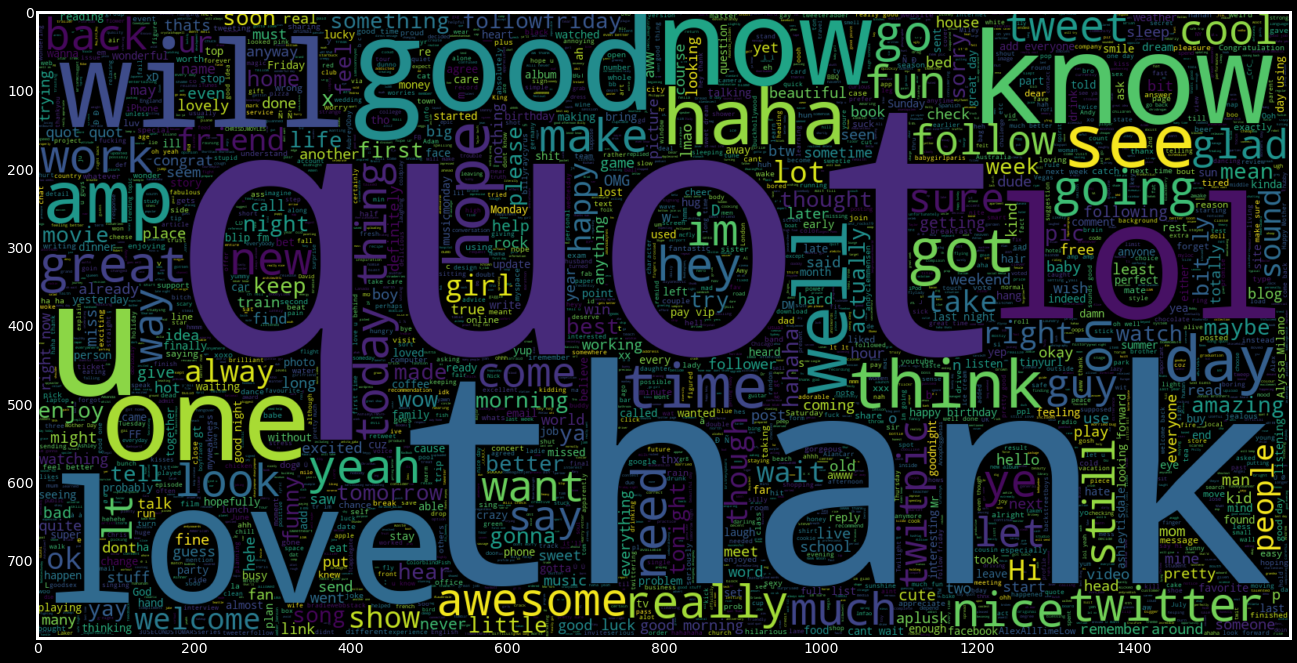

In [10]:
#menampilkan kata yang sering keluar pada positive menggunakan wordcloud

plt.figure(figsize = (20,20)) # Positive Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'positive'].SentimentText))
plt.imshow(wc , interpolation = 'bilinear')

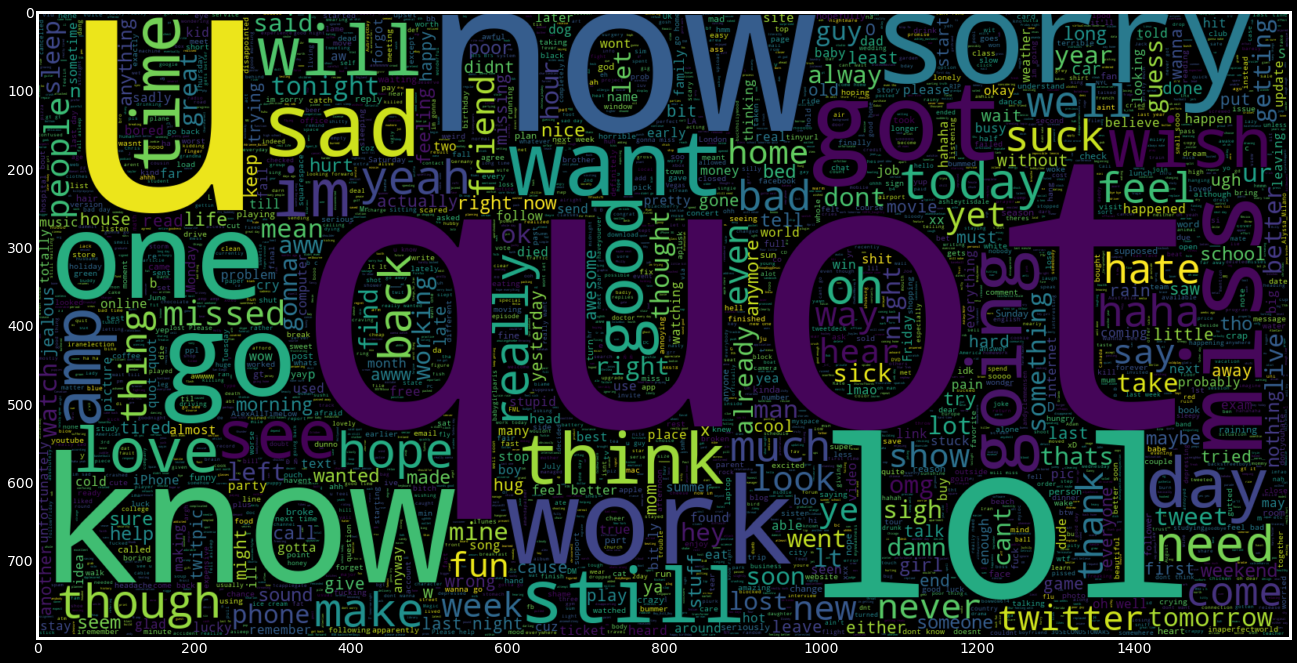

In [11]:
#menampilkan kata yang sering keluar pada negative menggunakan wordcloud

plt.figure(figsize = (20,20)) # Negative Sentiment
plt.grid(False)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(data[data.label == 'negative'].SentimentText))
plt.imshow(wc , interpolation = 'bilinear')

## PROCESSING TEXT

In [12]:
#fungsi untuk membersihkan kata pada teks 

def clean_the_tweet(text):
    
  text = text.encode("ascii", "ignore")
  text = text.decode()
    
  """ MENGHILANGKAN URL """
    
  text = re.sub('(www\.[^\s]+)|(https?://[^\s]+)',' ',text)
    
  """ MENGHILANGKAN HASHTAG """
  text = re.sub(r'#([^\s]+)', ' ', text)
    
  """ MENGHILANGKAN ANGKA """
  text = ''.join([i for i in text if not i.isdigit()])
    
  """ MENGHILANGKAN USERNAME """
  text = re.sub('@[^\s]+',' ',text)

  """ MENGHILANGKAN WHITESPACE """
  text = re.sub(r'\s+', ' ', text).strip()


  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))

  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

In [13]:
#membuat fungsi untuk processing pada text

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


In [14]:
data['cleaned_tweet'] = data['SentimentText'].apply(clean_the_tweet) #mengaply fungsi untuk membersihkan kata pada teks
data['cleaned_tweet'].head() #menampilkan data

0                                sad for my apl friend
1                                 the new moon trailer
2                                            already o
3    sooo im gunna cry i ve been at this dentist si...
4                          mi bf is cheating on me t t
Name: cleaned_tweet, dtype: object

In [15]:
data['cleaned_tweet'] = data['cleaned_tweet'].apply(text_process) #mengaply fungsi untuk processing kata pada teks
data.reset_index(drop=True, inplace = True)
data.head() #menampilkan data


,Sentiment,SentimentText,label,cleaned_tweet
0,0,is so sad for my APL frie...,negative,sad apl friend
1,0,I missed the New Moon trail...,negative,new moon trailer
2,1,omg its already 7:30 :O,positive,already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,negative,sooo im gunna cry dentist since suposed get cr...
4,0,i think mi bf is cheating on me!!! ...,negative,mi bf cheating


In [16]:
data['Sentiment'].unique() 

array([0, 1], dtype=int64)

## Pembobotan Teks

In [17]:
#menggunakan vectorizer TFIDF

vectorizer_tfidf = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer_tfidf.fit_transform(data.cleaned_tweet)

#menggunakan vectorizer CountVectorizer

vectorizer_count = CountVectorizer()
X_countvect = vectorizer_count.fit_transform(data.cleaned_tweet)


In [18]:
#membagi data dimana pembobotannya menggunakan TFIDF
x_train_idf, x_test_idf, y_train_idf, y_test_idf = train_test_split(X_tf_idf, data['Sentiment'], random_state=42)

#membagi data dimana pembobotannya menggunakan Countvectorizer
x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect = train_test_split(X_countvect, data['Sentiment'], random_state=42)

## ALGORITMA

In [19]:
#membuat fungsi untuk mencari score acuracy 

def check_scores(clf, X_train, X_test, y_train, y_test):
      model = clf.fit(X_train, y_train)
      predicted_class = model.predict(X_test)
      predicted_class_train = model.predict(X_train)
      test_probs = model.predict_proba(X_test)
      test_probs = test_probs[:, 1]
      yhat = model.predict(X_test)
      lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
      lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


      print('Train confusion matrix is: ',)
      print(confusion_matrix(y_train, predicted_class_train))
      print()

      print('Test confusion matrix is: ')
      print(confusion_matrix(y_test, predicted_class))
      print()

      print(classification_report(y_test,predicted_class)) 
      print() 

      train_accuracy = accuracy_score(y_train,predicted_class_train)
      test_accuracy = accuracy_score(y_test,predicted_class)

      print("Train accuracy score: ", train_accuracy)
      print("Test accuracy score: ",test_accuracy )
      print()
      
      train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
      test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

      print("Train ROC-AUC score: ", train_auc)
      print("Test ROC-AUC score: ", test_auc)
      fig, (ax1, ax2) = plt.subplots(1, 2)

      ax1.plot(lr_recall, lr_precision)
      ax1.set(xlabel="Recall", ylabel="Precision")

      plt.subplots_adjust(left=0.5,
                        bottom=0.1, 
                        right=1.5, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
      print()
      print('Are under Precision-Recall curve:', lr_f1)
      
      fpr, tpr, _ = roc_curve(y_test, test_probs)


      ax2.plot(fpr, tpr)
      ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

      print("Area under ROC-AUC:", lr_auc)
      return train_accuracy, test_accuracy, train_auc, test_auc

In [20]:
def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

### DEEP LEARNING

#### Artificial Neural Network

In [26]:
#membuat model untuk ANN

corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)

model=Sequential()
model.add(Dense(512, input_dim = max_sent_length, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['Sentiment'])
X_final.shape, y_final.shape

((99989, 418), (99989,))

In [27]:
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_final, y_final, test_size=0.3, random_state=42) #membagi data 
model_ann = model.fit(X_train_NN, y_train_NN, validation_data = (X_test_NN, y_test_NN), epochs=10, batch_size=64)

Epoch 1/10
1094/1094 [==============================] - 10s 8ms/step - loss: 0.6917 - accuracy: 0.5491 - val_loss: 0.6972 - val_accuracy: 0.5072
Epoch 2/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6888 - accuracy: 0.5525 - val_loss: 0.6852 - val_accuracy: 0.5614
Epoch 3/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.6860 - accuracy: 0.5578 - val_loss: 0.6851 - val_accuracy: 0.5609
Epoch 4/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6861 - accuracy: 0.5565 - val_loss: 0.6865 - val_accuracy: 0.5610
Epoch 5/10
1094/1094 [==============================] - 7s 7ms/step - loss: 0.6853 - accuracy: 0.5589 - val_loss: 0.6841 - val_accuracy: 0.5577
Epoch 6/10
1094/1094 [==============================] - 7s 6ms/step - loss: 0.6861 - accuracy: 0.5562 - val_loss: 0.6887 - val_accuracy: 0.5604
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 0.6856 - accuracy: 0.5583 - val_loss: 0.6840 - val_accuracy

In [28]:
y_test_pred_NN=np.round(model.predict(X_test_NN))
y_train_pred_NN=np.round(model.predict(X_train_NN))
y_test_pred_NN

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [29]:
test_acc_NN = accuracy_score(y_test_NN, y_test_pred_NN) #mencari score accuracy pada data test
train_acc_NN = accuracy_score(y_train_NN, y_train_pred_NN) #mencari score accuracy pada data train
test_roc_NN = roc_auc_score(y_test_NN, y_test_pred_NN) #mencari score roc pada data test
train_roc_NN = roc_auc_score(y_train_NN, y_train_pred_NN) #mencari score roc pada data train

print("Acuuracy Test : " + str(test_acc_NN)) #menampilkan hasil akurasi pada data test
print("Acuuracy Train : " + str(train_acc_NN)) #menampilkan hasil akurasi pada data train
print("ROC Test : " + str(test_roc_NN)) #menampilkan hasil roc akurasi pada data test
print("ROC Train : " + str(train_roc_NN)) #menampilkan hasil roc akurasi pada data train

Acuuracy Test : 0.5583224989165583
Acuuracy Train : 0.5625500057149388
ROC Test : 0.5142137013509105
ROC Test : 0.5142048789830428


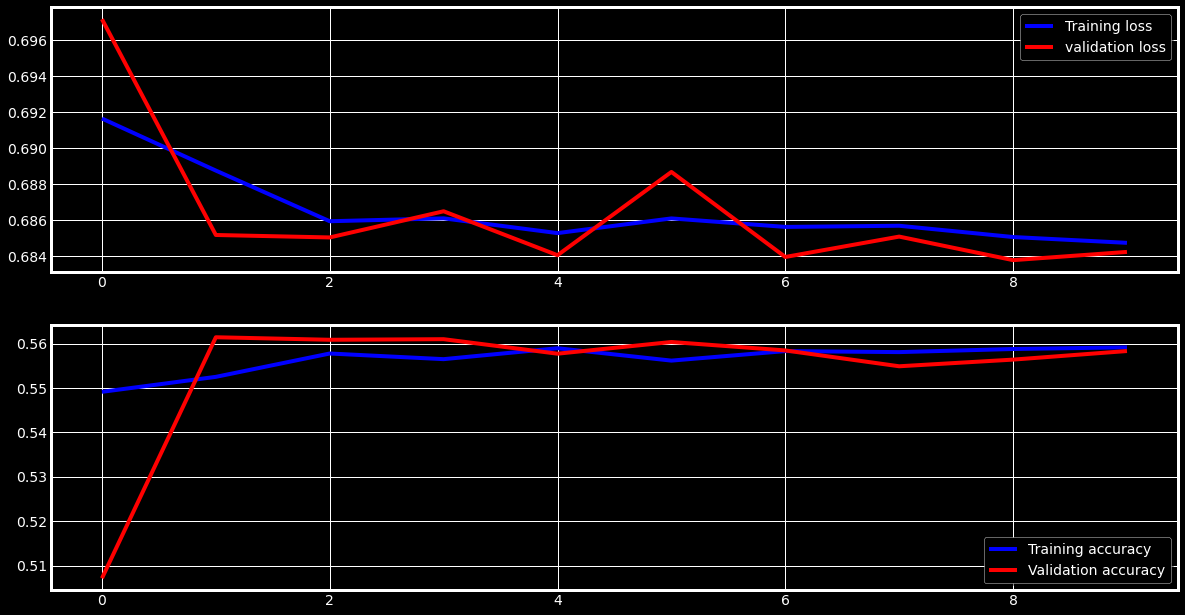

In [30]:
# Plot kurva loss dan accuracy untuk training dan validation 

fig, ax = plt.subplots(2,1, figsize=(18, 10)) # Set Figure
ax[0].plot(model_ann.history['loss'], color='b', label="Training loss") #plot kurva untuk loss pada training
ax[0].plot(model_ann.history['val_loss'], color='r', label="validation loss",axes =ax[0]) #plot kurva untuk loss pada validasi
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_ann.history['accuracy'], color='b', label="Training accuracy") #plot kurva untuk akurasi pada training
ax[1].plot(model_ann.history['val_accuracy'], color='r',label="Validation accuracy") #plot kurva untuk akurasi pada validasi
legend = ax[1].legend(loc='best', shadow=True)

#### LSTM

In [31]:
#membuat model untuk LSTM

corpus = [data['cleaned_tweet'][i] for i in range( len(data))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
model=Sequential()
model.add(Embedding(voc_size,64,input_length=max_sent_length))
model.add(Dropout(0.4))
model.add(LSTM(128))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(data['Sentiment'])
X_final.shape,y_final.shape

((99989, 418), (99989,))

In [33]:
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_final, y_final, test_size=0.3, random_state=42) #membagi data 
model_lstm = model.fit(X_train_LSTM, y_train_LSTM, validation_data = (X_test_LSTM, y_test_LSTM), epochs=10, batch_size=64)

Epoch 1/10
1094/1094 [==============================] - 846s 773ms/step - loss: 0.6134 - accuracy: 0.6663 - val_loss: 0.5921 - val_accuracy: 0.6844
Epoch 2/10
1094/1094 [==============================] - 885s 809ms/step - loss: 0.5732 - accuracy: 0.7041 - val_loss: 0.5846 - val_accuracy: 0.6902
Epoch 3/10
1094/1094 [==============================] - 998s 913ms/step - loss: 0.5536 - accuracy: 0.7163 - val_loss: 0.5912 - val_accuracy: 0.6874
Epoch 4/10
1094/1094 [==============================] - 840s 768ms/step - loss: 0.5347 - accuracy: 0.7295 - val_loss: 0.6032 - val_accuracy: 0.6851
Epoch 5/10
1094/1094 [==============================] - 859s 786ms/step - loss: 0.5164 - accuracy: 0.7405 - val_loss: 0.6189 - val_accuracy: 0.6815
Epoch 6/10
1094/1094 [==============================] - 1003s 917ms/step - loss: 0.5004 - accuracy: 0.7505 - val_loss: 0.6305 - val_accuracy: 0.6792
Epoch 7/10
1094/1094 [==============================] - 1024s 936ms/step - loss: 0.4854 - accuracy: 0.7600 - va

In [34]:
y_test_pred_LSTM=np.round(model.predict(X_test_LSTM))
y_train_pred_LSTM=np.round(model.predict(X_train_LSTM))
y_test_pred_LSTM

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [35]:
test_acc_LSTM = accuracy_score(y_test_LSTM, y_test_pred_LSTM) #mencari score accuracy pada data test
train_acc_LSTM = accuracy_score(y_train_LSTM, y_train_pred_LSTM) #mencari score accuracy pada data train
test_roc_LSTM = roc_auc_score(y_test_LSTM, y_test_pred_LSTM) #mencari score roc pada data test
train_roc_LSTM = roc_auc_score(y_train_LSTM, y_train_pred_LSTM) #mencari score roc pada data train

print("Acuuracy Test : " + str(test_acc_LSTM)) #menampilkan hasil akurasi pada data test
print("Acuuracy Train : " + str(train_acc_LSTM)) #menampilkan hasil akurasi pada data train
print("ROC Test : " + str(test_roc_LSTM)) #menampilkan hasil roc pada data test
print("ROC Train : " + str(train_roc_LSTM)) #menampilkan hasil roc pada data train

Acuuracy Test : 0.6678667866786678
Acuuracy Train : 0.8159932563721568
ROC Test : 0.6563430639670143
ROC Test : 0.8046495322872064


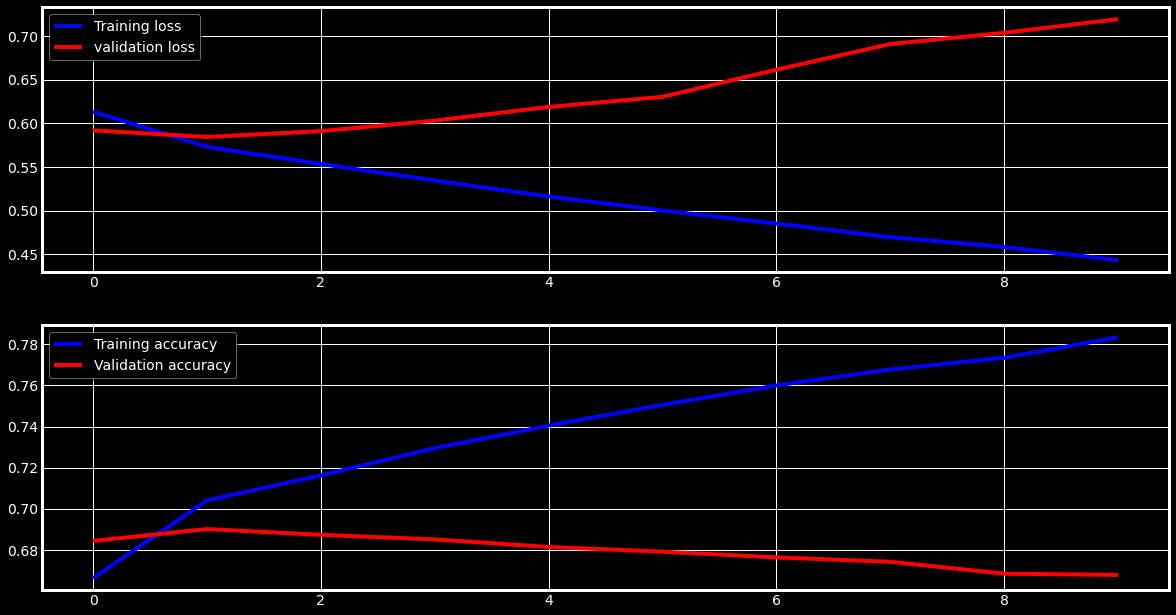

In [36]:
# Plot kurva loss dan accuracy untuk training dan validation 

fig, ax = plt.subplots(2,1, figsize=(18, 10)) # Set Figure
ax[0].plot(model_lstm.history['loss'], color='b', label="Training loss") #plot kurva untuk loss pada training
ax[0].plot(model_lstm.history['val_loss'], color='r', label="validation loss",axes =ax[0]) #plot kurva untuk loss pada validasi
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_lstm.history['accuracy'], color='b', label="Training accuracy") #plot kurva untuk akurasi pada training
ax[1].plot(model_lstm.history['val_accuracy'], color='r',label="Validation accuracy") #plot kurva untuk akurasi pada validasi
legend = ax[1].legend(loc='best', shadow=True)

### MACHINE LEARNING

#### NAIVE BAYES

##### Multinomial Naive Bayes

In [37]:
multinomial_nb = MultinomialNB(alpha=0.33) #menggunakan algoritma naive bayes

**Vectorizer menggunakan TFIDF**

Train confusion matrix is: 
[[22210 10360]
 [ 3831 38590]]

Test confusion matrix is: 
[[ 5905  5057]
 [ 2560 11476]]

              precision    recall  f1-score   support

           0       0.70      0.54      0.61     10962
           1       0.69      0.82      0.75     14036

    accuracy                           0.70     24998
   macro avg       0.70      0.68      0.68     24998
weighted avg       0.70      0.70      0.69     24998


Train accuracy score:  0.8107639583416677
Test accuracy score:  0.695295623649892

Train ROC-AUC score:  0.8954360974131569
Test ROC-AUC score:  0.7519945388689308

Are under Precision-Recall curve: 0.7508260001962772
Area under ROC-AUC: 0.785647771777848


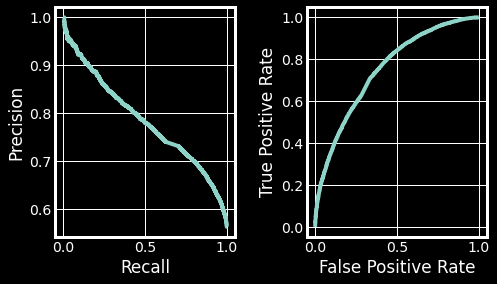

In [38]:
#mencari akurasi yang dihasilkan menggunakan multinomial naive bayes menggunakan TFIDF Vectorizer

m_train_accuracy_tfidf, m_test_accuracy_tfidf, m_train_auc_tfidf, m_test_auc_tfidf  = check_scores(multinomial_nb , x_train_idf, x_test_idf, y_train_idf, y_test_idf)

**Vectorizer menggunakan Countvectorizer**

Train confusion matrix is: 
[[23785  8785]
 [ 5500 36921]]

Test confusion matrix is: 
[[ 6708  4254]
 [ 3204 10832]]

              precision    recall  f1-score   support

           0       0.68      0.61      0.64     10962
           1       0.72      0.77      0.74     14036

    accuracy                           0.70     24998
   macro avg       0.70      0.69      0.69     24998
weighted avg       0.70      0.70      0.70     24998


Train accuracy score:  0.8095104745902841
Test accuracy score:  0.7016561324905992

Train ROC-AUC score:  0.8896194734191998
Test ROC-AUC score:  0.750300849526609

Are under Precision-Recall curve: 0.7439049515829957
Area under ROC-AUC: 0.7737746069351399


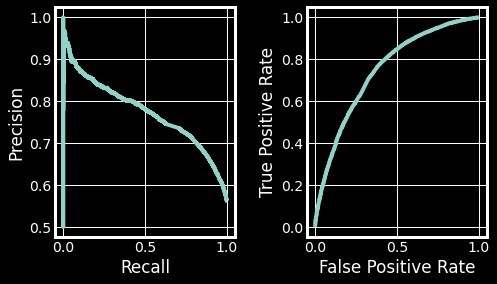

In [39]:
#mencari akurasi yang dihasilkan menggunakan multinomial naive bayes menggunakan CountVectorizer

m_train_accuracy_countvect, m_test_accuracy_countvect, m_train_auc_countvect, m_test_auc_countvect = check_scores(multinomial_nb , x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect)

##### Complement Naive Bayes

In [40]:
complement_nb = ComplementNB(alpha=0.33) #menggunakan algoritma complement naive bayes

**Vectorizer menggunakan TFIDF**

Train confusion matrix is: 
[[27003  5567]
 [10347 32074]]

Test confusion matrix is: 
[[7872 3090]
 [5239 8797]]

              precision    recall  f1-score   support

           0       0.60      0.72      0.65     10962
           1       0.74      0.63      0.68     14036

    accuracy                           0.67     24998
   macro avg       0.67      0.67      0.67     24998
weighted avg       0.68      0.67      0.67     24998


Train accuracy score:  0.7877878678774787
Test accuracy score:  0.6668133450676054

Train ROC-AUC score:  0.8954360974131569
Test ROC-AUC score:  0.7519945388689308

Are under Precision-Recall curve: 0.6787023106893493
Area under ROC-AUC: 0.785647771777848


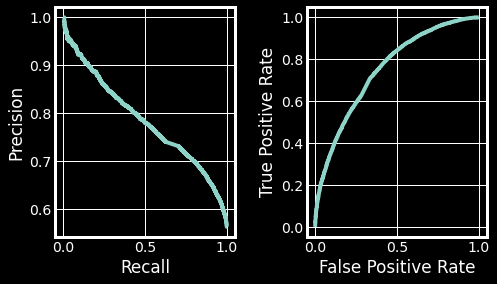

In [41]:
#mencari akurasi yang dihasilkan menggunakan complement naive bayes menggunakan TFIDF Vectorizer

cnb_train_accuracy_tfidf, cnb_test_accuracy_tfidf, cnb_train_auc_tfidf, cnb_test_auc_tfidf  = check_scores(complement_nb , x_train_idf, x_test_idf, y_train_idf, y_test_idf)

**Vectorizer menggunakan Countvectorizer**

Train confusion matrix is: 
[[27052  5518]
 [10946 31475]]

Test confusion matrix is: 
[[7950 3012]
 [5221 8815]]

              precision    recall  f1-score   support

           0       0.60      0.73      0.66     10962
           1       0.75      0.63      0.68     14036

    accuracy                           0.67     24998
   macro avg       0.67      0.68      0.67     24998
weighted avg       0.68      0.67      0.67     24998


Train accuracy score:  0.7804536544385327
Test accuracy score:  0.6706536522921833

Train ROC-AUC score:  0.8896197176920031
Test ROC-AUC score:  0.7503013304750956

Are under Precision-Recall curve: 0.6816687932567762
Area under ROC-AUC: 0.7737748582573095


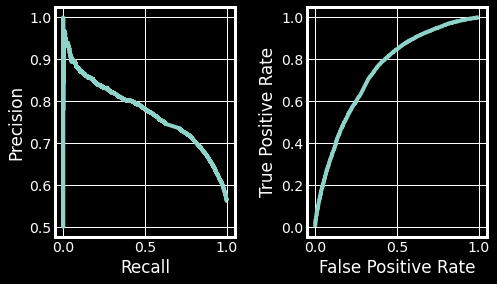

In [42]:
#mencari akurasi yang dihasilkan menggunakan complement naive bayes menggunakan CountVectorizer

cnb_train_accuracy_cv, cnb_test_accuracy_cv, cnb_train_auc_cv, cnb_test_auc_cv= check_scores(complement_nb , x_train_countvect, x_test_countvect, y_train_countvect, y_test_countvect)

#### SVM

Train confusion matrix is: 
[[27612  4958]
 [ 1662 40759]]

Test confusion matrix is: 
[[ 5997  4965]
 [ 2273 11763]]

              precision    recall  f1-score   support

           0       0.73      0.55      0.62     10962
           1       0.70      0.84      0.76     14036

    accuracy                           0.71     24998
   macro avg       0.71      0.69      0.69     24998
weighted avg       0.71      0.71      0.70     24998


Train accuracy score:  0.9117227400621408
Test accuracy score:  0.7104568365469237

Train ROC-AUC score:  0.9345610859585718
Test ROC-AUC score:  0.7685677994901322

Are under Precision-Recall curve: 0.7647250032505527
Area under ROC-AUC: 0.7915585005361206


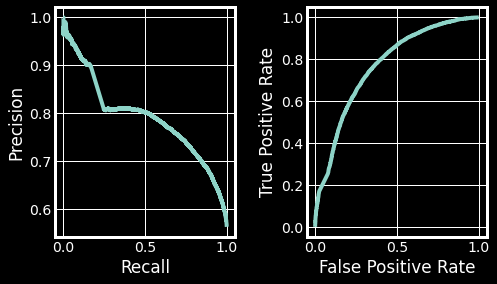

In [43]:
SVM = svm.SVC(probability=True) #menggunakan algoritma SVM
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM, x_train_idf, x_test_idf, y_train_idf, y_test_idf) #mencari akurasi yang dihasilkan menggunakan svm menggunakan TFIDF Vectorizer

#### SVM (HYPER PARAMETER TUNNING)

In [70]:
#menset parameter yang akan digunakan

parameters ={
    "C":[0.1, 1, 10],
    "kernel":['linear', 'sigmoid'],
    "gamma":['scale', 'auto']
}

In [71]:
svm_optimized_idf = grid_search(svm.SVC(probability=True), parameters, x_train_idf, y_train_idf)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=20.6min


In [ ]:
so_train_accuracy_idf, so_test_accuracy_idf, so_train_auc_idf, so_test_auc_idf = check_scores(svm_optimized, x_train_idf, x_test_idf, y_train_idf, y_test_idf)

#### RANDOM FOREST

In [50]:
rf = RandomForestClassifier(random_state=0)

Train confusion matrix is: 
[[30150  2420]
 [  494 41927]]

Test confusion matrix is: 
[[ 6232  4730]
 [ 2809 11227]]

              precision    recall  f1-score   support

           0       0.69      0.57      0.62     10962
           1       0.70      0.80      0.75     14036

    accuracy                           0.70     24998
   macro avg       0.70      0.68      0.69     24998
weighted avg       0.70      0.70      0.69     24998


Train accuracy score:  0.9611420037071116
Test accuracy score:  0.6984158732698615

Train ROC-AUC score:  0.9926423576843306
Test ROC-AUC score:  0.7535673736557424

Are under Precision-Recall curve: 0.7486413496482512
Area under ROC-AUC: 0.783429352793829


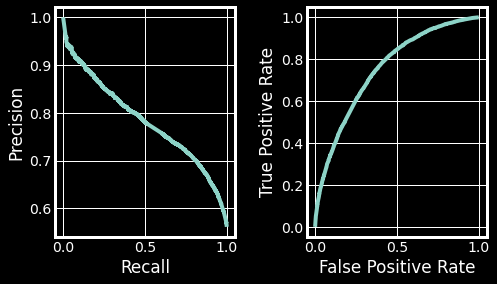

In [51]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc  = check_scores(rf , x_train_idf, x_test_idf, y_train_idf, y_test_idf)

## HASIL UNTUK KESELURUHAN MODEL

In [64]:
data = [('Artificial Neural Network',train_acc_NN, test_acc_NN, train_roc_NN, test_roc_NN),
        ('LSTM',train_acc_LSTM, test_acc_LSTM, train_roc_LSTM, test_roc_LSTM),
        ('Multinomial Naive Bayes Using TFIDF Using TFIDF Vectorizer', m_train_accuracy_tfidf, m_test_accuracy_tfidf, m_train_auc_tfidf, m_test_auc_tfidf),
        ('Multinomial Naive Bayes Using TFIDF Using CountVectorizer', m_train_accuracy_countvect, m_test_accuracy_countvect, m_train_auc_countvect, m_test_auc_countvect),
        ('Complement Naive Bayes Using TFIDF Using TFIDF Vectorizer', cnb_train_accuracy_tfidf, cnb_test_accuracy_tfidf, cnb_train_auc_tfidf, cnb_test_auc_tfidf),
        ('Complement Naive Bayes Using TFIDF Using CountVectorizer', cnb_train_accuracy_cv, cnb_test_accuracy_cv, cnb_train_auc_cv, cnb_test_auc_cv),
        ('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
        ('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc)]



Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Artificial Neural Network,0.562550,0.558322,0.514205,0.514214
LSTM,0.815993,0.667867,0.804650,0.656343
Multinomial Naive Bayes Using TFIDF Using TFIDF Vectorizer,0.810764,0.695296,0.895436,0.751995
Multinomial Naive Bayes Using TFIDF Using CountVectorizer,0.809510,0.701656,0.889619,0.750301
Complement Naive Bayes Using TFIDF Using TFIDF Vectorizer,0.787788,0.666813,0.895436,0.751995
Complement Naive Bayes Using TFIDF Using CountVectorizer,0.780454,0.670654,0.889620,0.750301
Random Forest,0.961142,0.698416,0.992642,0.753567
SVM,0.911723,0.710457,0.934561,0.768568
